# Exercise - Opretholdelse af Hemoglobin balance

You slice your leg open with an axe and loose 1.5 L of blood before you stop the bleeding. Assume that you originally had a concentration of 150g/L hemoglobin, 45% hematocrit, and 5L of blood before your accident.



### A. 
The blood volume is generally made up quickly by fluid entering plasma from the ISF and
from fluid intake (persons who lose blood get thirsty). 
What would the new hemoglobin concentration, hematocrit, and total amount of hemoglobin be in the blood be immideately after you have lost 1.5L of blood, and the blood volume has returned to 5L?



### A. Answer


In [16]:
C0 = 150.0 # g/L concentration prior to bloodloss
Htc = 45.0 # hematocrit value prior to bloodloss
V_blood = 5.0 # Volume of blood, before bloodloss
V_loss = 1.5 # Volume of lossed blood

C_after_bloodloss = C0 * (V_blood-V_loss)/V_blood
Htc_after_bloodloss = Htc * (V_blood - V_loss) / V_blood
Hb_init = C0 * V_blood
Hb_after_bloodloss = C_after_bloodloss * (V_blood)

print(f"{C_after_bloodloss=}g/L")
print(f"{Htc_after_bloodloss=}%")
print(f"{Hb_init=}%")
print(f"{Hb_after_bloodloss=}%")




C_after_bloodloss=105.0g/L
Htc_after_bloodloss=31.5%
Hb_init=750.0%
Hb_after_bloodloss=525.0%



### B.
How long does it take to recover one-half of the lost Hb?





### C.
The rate of formation of red blood cells depends in part on the recycling of iron from
destroyed red blood cells, but can be increased by erythropoietin and mobilization of Fe from
ferritin stores in the liver. Suppose that the average life-span of the red blood cells is 120
days. Suppose further that the rate of hemoglobin production is constant of 6.3 g/day.
Write an equation for the recovery of the hemoglobin concentration after the
loss of blood, using the differencial equation: 

$ \frac{dHb}{dt} = - k Hb + S$




### C. Answer

$ \frac{dHb}{dt} = - k Hb + S$


$ \int \frac{dHb}{Hb-\frac{S}{k}}  =  - kdt $

$ Hb = Hb_0 e^{-kt} + \frac{S}{k} (1-e^{-kt}) $

At $t=0$, $Hb = Hb_0$, which is the initial hemoglobin content, and rises to $Hb_\infty =\frac{S}{k}$ at $t = \infty$. 
Here we can express this in terms of the final Hb:

$Hb = Hb_\infty + (Hb_0 - Hb_\infty) e^{-kt}$



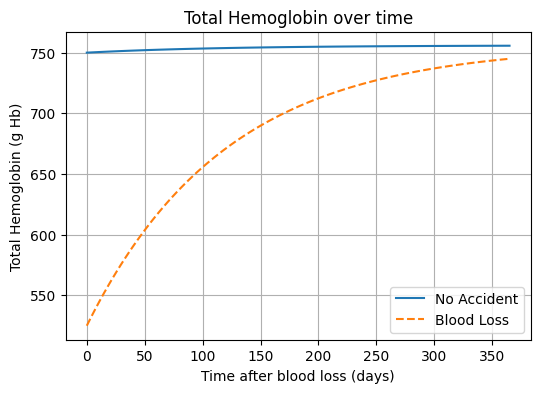

In [17]:
# %load run_hemoglobin_model.py
import numpy as np
import matplotlib.pyplot as plt

from hemoglobin_model import hemoglobin_model

if __name__ == "__main__":
    N = 100 # number of timepoints to plot (100 is fine)
    t_max = 365.0
    t = np.linspace(0.0, t_max, 100)  # days
    k = 1.0 / 120.0  # fractional turnover rate, uddrivelsesraten / dag
    S = 6.3  # rate of hemoglobin production gHb / dag
    Hb_no_accident = hemoglobin_model(Hb0=Hb_init, t=t, k=k, S=S)
    Hb_bloodloss = hemoglobin_model(Hb0=Hb_after_bloodloss, t=t, k=k, S=S)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(t, Hb_no_accident, label="No Accident")
    plt.plot(t, Hb_bloodloss, label="Blood Loss", linestyle="--")
    plt.xlabel("Time after blood loss (days)")
    plt.ylabel("Total Hemoglobin (g Hb)")
    plt.title("Total Hemoglobin over time")
    plt.legend()
    plt.grid(True)
    plt.show()
